In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
x=np.linspace(5.0,150.0,300)

# Calibration Curves

## AIR

In [2]:
ro,cal=np.loadtxt('AIR_602(E300)_SS_0_PSIG.dat',unpack=True) # sccm
airflow=interpolate.interp1d(ro, cal)

## ARGON

In [3]:
ro,cal=np.loadtxt('ARGON_602(E300)_SS_0_PSIG.dat',unpack=True) # sccm
arflow=interpolate.interp1d(ro, cal)

## CARBON DIOXIDE

In [4]:
ro,cal=np.loadtxt('CARBON_DIOXIDE_602(E300)_SS_0_PSIG.dat',unpack=True) # sccm
co2flow=interpolate.interp1d(ro, cal)

## Plots 

Straight from the tables

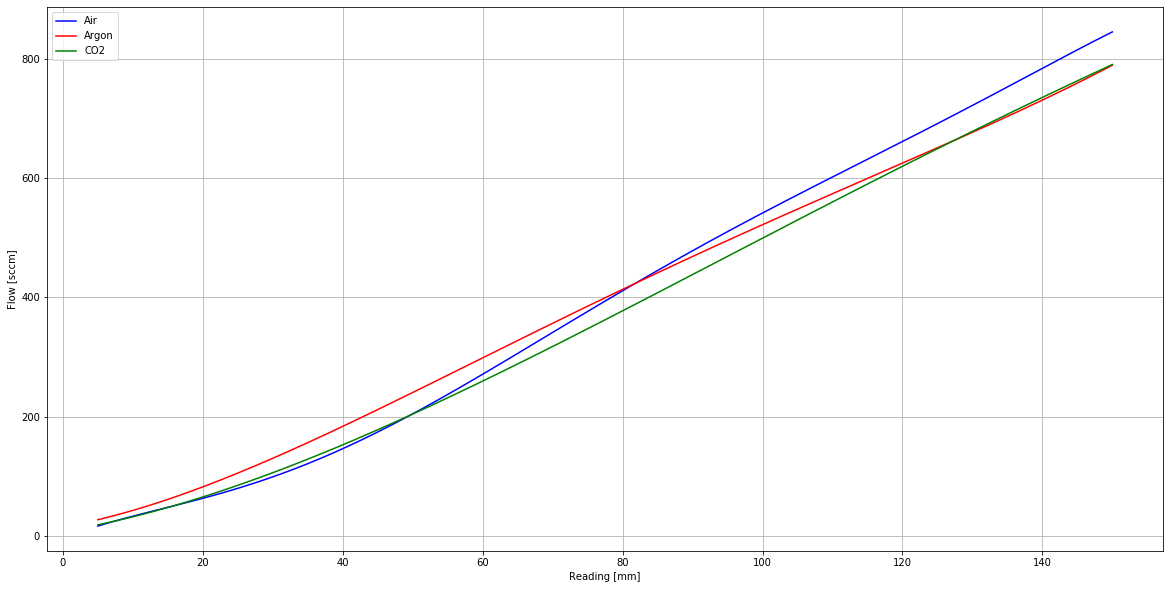

In [5]:
plt.plot(x, airflow(x), 'b', label='Air')
plt.plot(x, arflow(x),  'r',  label='Argon')
plt.plot(x, co2flow(x),  'g',  label='CO2')
plt.xlabel('Reading [mm]')
plt.ylabel('Flow [sccm]')
plt.grid()
plt.legend(loc='upper left')
plt.show()

# Corrections to the Calibration

Version (1) detailed in:
https://www.mathesongas.com/pdfs/flowchart/RotameterGasFactorChart.pdf

In [6]:
ArAir_factor=0.851
ArAirFlowCorr=airflow(x)*ArAir_factor
CO2Air_factor=0.808
CO2AirFlowCorr=airflow(x)*CO2Air_factor

Version (2) detailed in:
https://www.mathesongas.com/sites/default/files/inline-files/Flowmeter-Product-Line-Overview.pdf

In [7]:
AirAr_factor=1.18
AirArFlowCorr=arflow(x)*AirAr_factor
AirCO2_factor=1.23
AirCO2FlowCorr=co2flow(x)*AirCO2_factor

## Plots

Comparison among different corrections

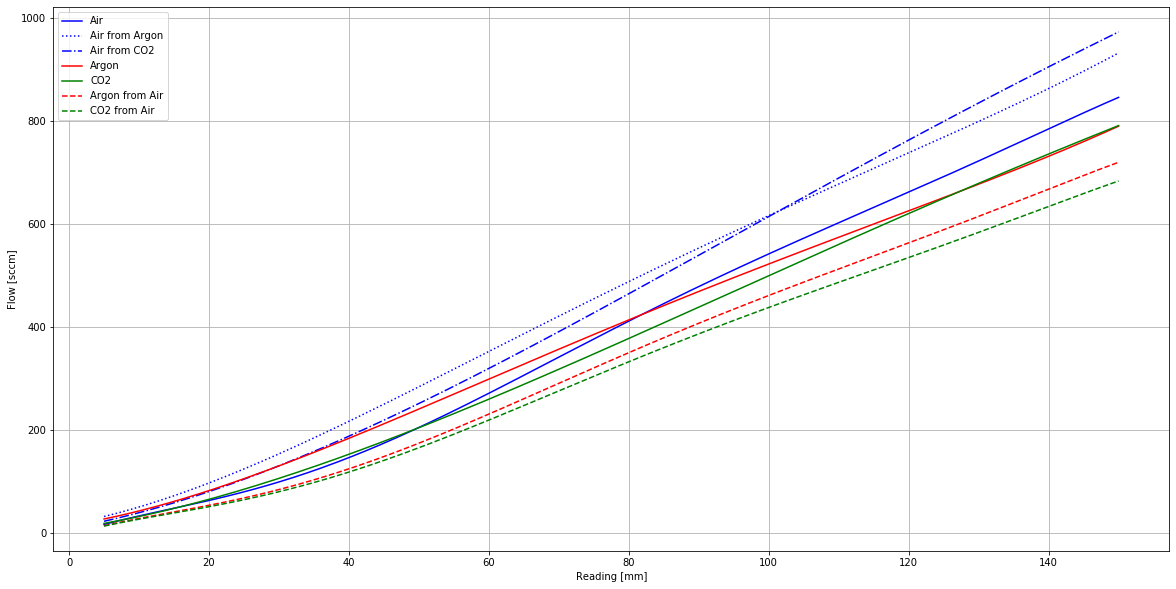

In [8]:
plt.plot(x, airflow(x), 'b', label='Air')

plt.plot(x, AirArFlowCorr,  'b:', label='Air from Argon')
plt.plot(x, AirCO2FlowCorr, 'b-.', label='Air from CO2')

plt.plot(x, arflow(x),  'r',  label='Argon')
plt.plot(x, co2flow(x),  'g',  label='CO2')

plt.plot(x, ArAirFlowCorr,  'r--', label='Argon from Air')
plt.plot(x, CO2AirFlowCorr, 'g--', label='CO2 from Air')

plt.xlabel('Reading [mm]')
plt.ylabel('Flow [sccm]')
plt.grid()
plt.legend(loc='upper left')
plt.show()

# Conclusion

One way or the other, the correction factors applied to the air calibration don't return the expected the calibration curve for the gas under consideration.